# Active acoustic data analysis for 18Hz **and** 38Hz data
**Explore data :** 
1) **Data structure** : NetCDF4 : its variables
2) **Time dimension** : How many sample by seasons / year ? At what time was the data recorded ?
3) **Space dimension** : Where was the data recorded ?
4) **Time and space dimensions** : The data at the time and location it was recorded

#### Imports

In [46]:
%load_ext autoreload
%autoreload 2
from data_extraction_functions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
import netCDF4 as nc
import os
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Dict, Tuple
import datetime
import pandas as pd
import xarray as xr
from shapely.geometry import Point, Polygon
import shutil
import os
import math

## Explore data

## **1) Data structure**

### Test de xarray

In [48]:
list_cdf_files=get_list_files() # Open folder containing all nc files and get list of all nc files path
dataset_xr = open_dataset_xr(3, list_cdf_files)
depth = dataset_xr["DEPTH"]
print(depth.values)
close_dataset(dataset_xr)

[   2.5    7.5   12.5   17.5   22.5   27.5   32.5   37.5   42.5   47.5
   52.5   57.5   62.5   67.5   72.5   77.5   82.5   87.5   92.5   97.5
  102.5  107.5  112.5  117.5  122.5  127.5  132.5  137.5  142.5  147.5
  152.5  157.5  162.5  167.5  172.5  177.5  182.5  187.5  192.5  197.5
  202.5  207.5  212.5  217.5  222.5  227.5  232.5  237.5  242.5  247.5
  252.5  257.5  262.5  267.5  272.5  277.5  282.5  287.5  292.5  297.5
  302.5  307.5  312.5  317.5  322.5  327.5  332.5  337.5  342.5  347.5
  352.5  357.5  362.5  367.5  372.5  377.5  382.5  387.5  392.5  397.5
  402.5  407.5  412.5  417.5  422.5  427.5  432.5  437.5  442.5  447.5
  452.5  457.5  462.5  467.5  472.5  477.5  482.5  487.5  492.5  497.5
  502.5  507.5  512.5  517.5  522.5  527.5  532.5  537.5  542.5  547.5
  552.5  557.5  562.5  567.5  572.5  577.5  582.5  587.5  592.5  597.5
  602.5  607.5  612.5  617.5  622.5  627.5  632.5  637.5  642.5  647.5
  652.5  657.5  662.5  667.5  672.5  677.5  682.5  687.5  692.5  697.5
  702.

### **Test echogram**

(10860, 240)


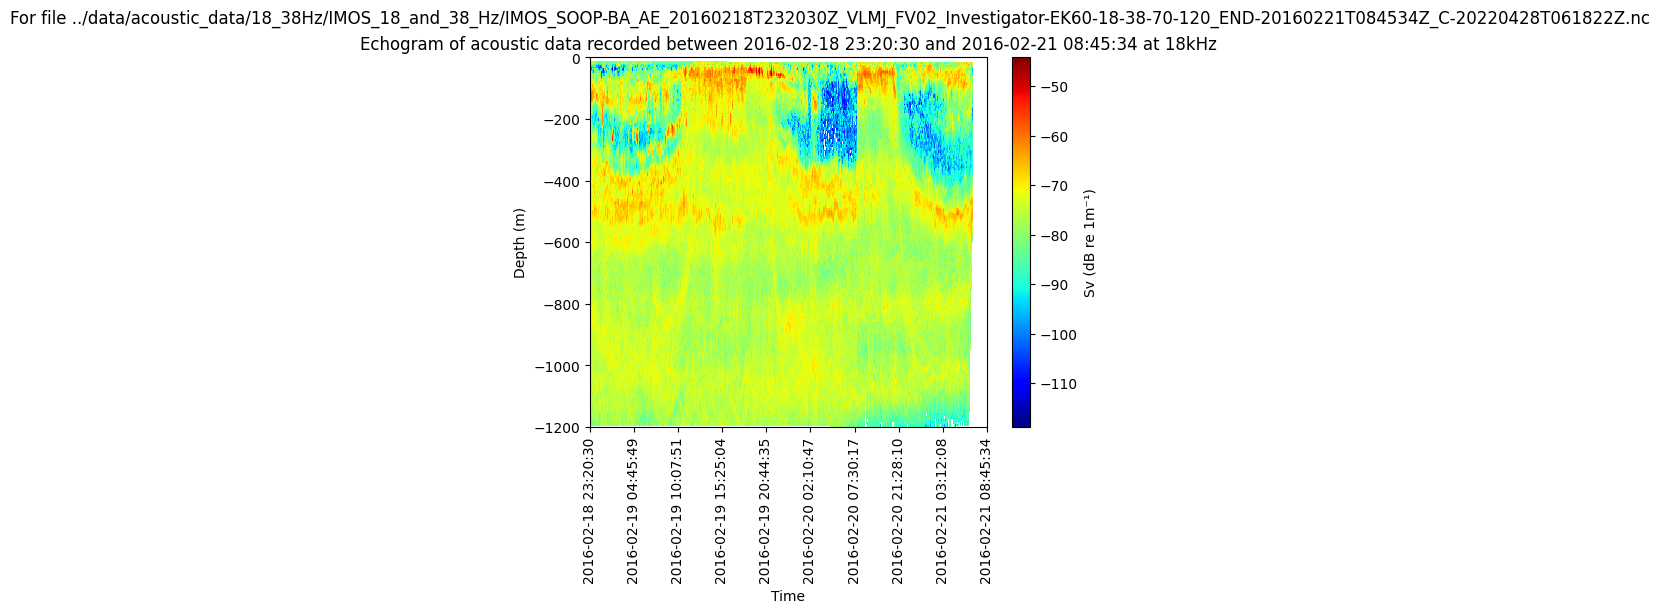

In [49]:
list_cdf_files=get_list_files() # Open folder containing all nc files and get list of all nc files path
dataset = open_dataset(3, list_cdf_files) # Open file i
# print(dataset)
# show_dataset(dataset)
plot_echogram(dataset, 0, list_cdf_files[3], save=True) # plot echogram of file path (dataset) at freq 0
close_dataset(dataset) # close dataset

## **2) Time dimension**

### **Test histogram**

There are 10860 samples in 3th dataset


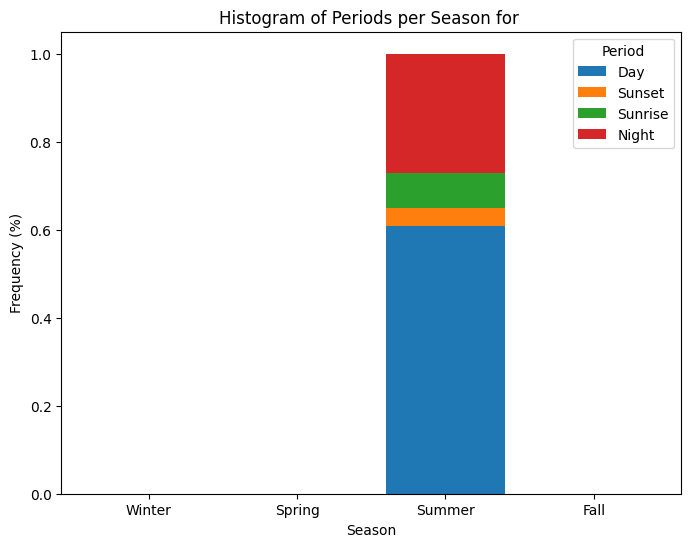

In [6]:
# Test for 1 file
list_cdf_files=get_list_files() # Open folder containing all nc files and get list of all nc files path
i = 3 # Chose file to open
dataset=open_dataset(i, list_cdf_files) # Open file i
season_counts  = count_season(dataset) # Count occurences of period d in season s in file i and 

# Normalization of counts into frequency
n = get_datetime(dataset).shape[0]
for season in season_counts.keys():
    season_counts[season]=season_counts[season]/n
print(f"There are {n} samples in {i}th dataset") 

plot_histogram(season_counts) # Plot histogram
dataset.close() # Close dataset

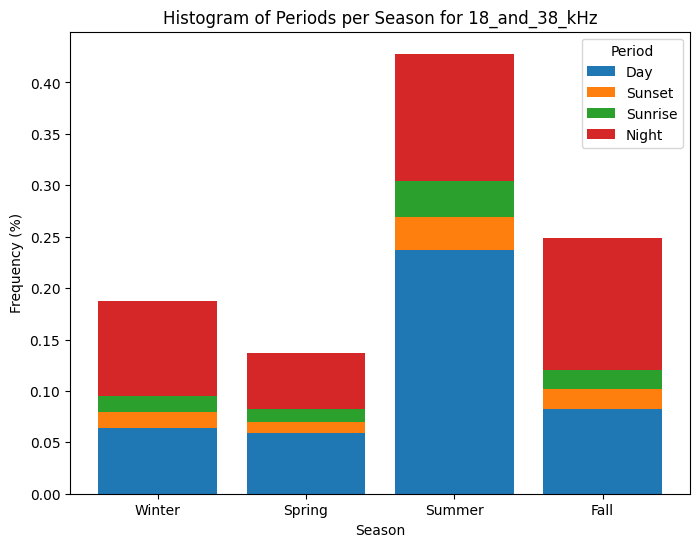

There is a total of  738553  samples


In [7]:
# Test plot histogram on all nc files of folder 

list_cdf_files=get_list_files() # Open folder containing all nc files and get list of all nc files path
all_seasons_couts, n_all= count_season_all_files(list_cdf_files) # Open file i
plot_histogram(all_seasons_couts, save=True, dataset_name="18_and_38_kHz") # Plot histogram
print("There is a total of ", n_all, " samples")

### **Get depth relatively to frequences of sonar**

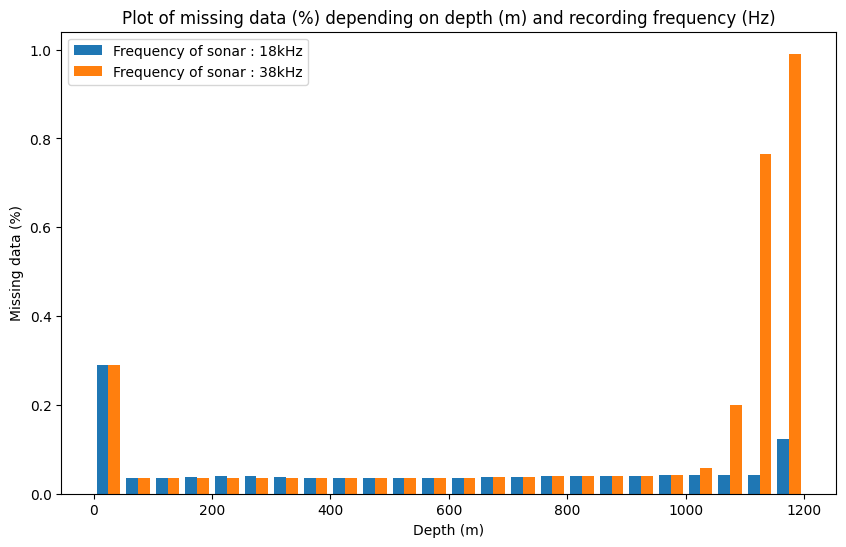

In [8]:
# test get_depth_depending_on_freq_sonar()
list_cdf_files=get_list_files()    # Get all netcdf files path of folder chosen
ds = open_dataset(3, list_cdf_files)    # Open netCDF into nc.Dataset

# Get parameters
depths = ds['DEPTH'][:]
channels_dict={0 : '18kHz', 1:'38kHz'}

# Count missing datas
missing_datas = count_missing_data(ds, ['18kHz', '38kHz'])

# Plot missing datas
plot_missing_data(missing_datas, depths, 10, channels_dict, title=f"file 3", save=True)

# Close dataset
close_dataset(ds)     # Close dataset

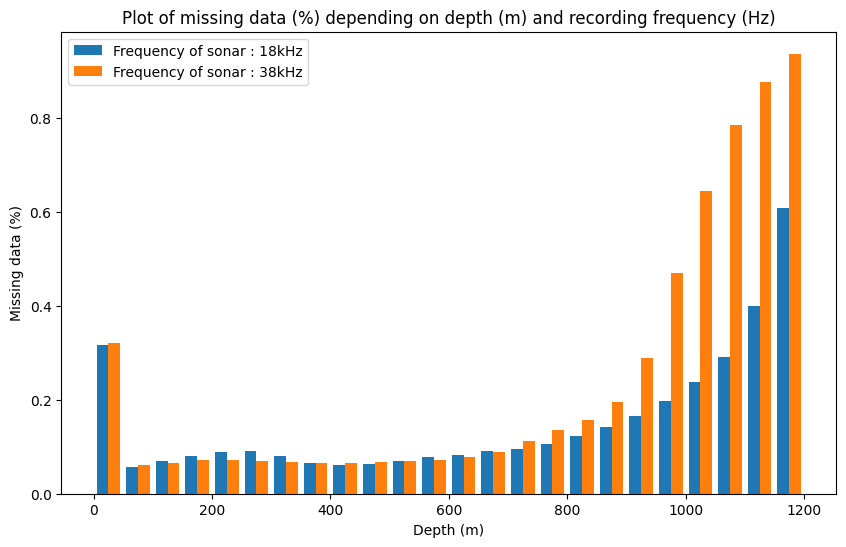

In [9]:
all_missing_datas=get_missing_data_all_files()
plot_missing_data(all_missing_datas, depths, 10, channels_dict, title="all_18_and_38Hz", save=True)

### Should have been done before : stack data of each file into one array

## **3) Space dimension**

## Display set of trajectories

-65.6429596286 -10.43668 57.2531684925 150.0167436821


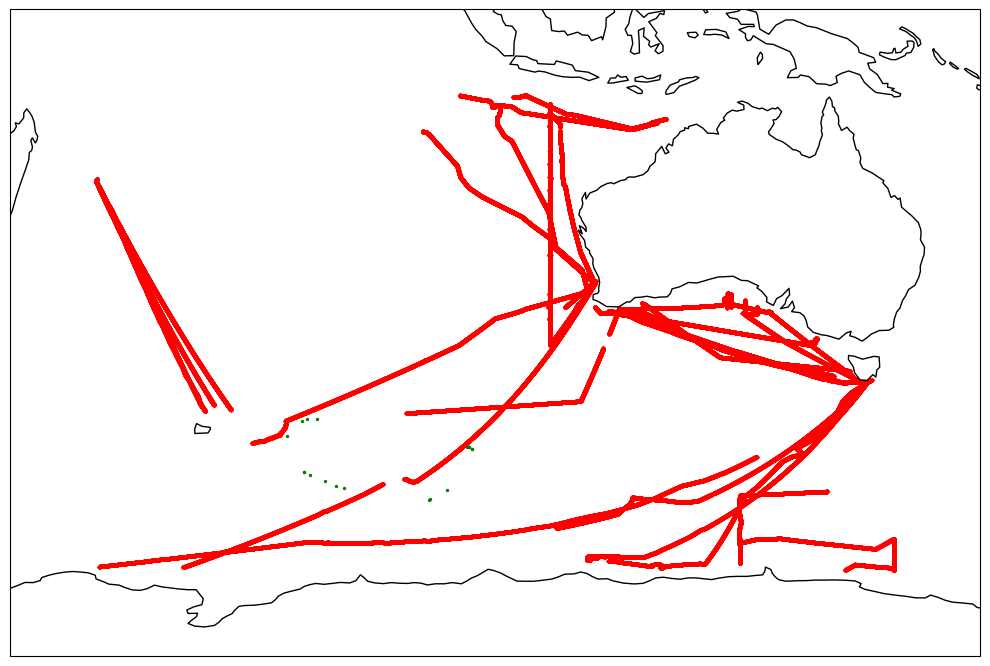

In [43]:
display_all_trajectories_folder(enveloppe=True, save=True)

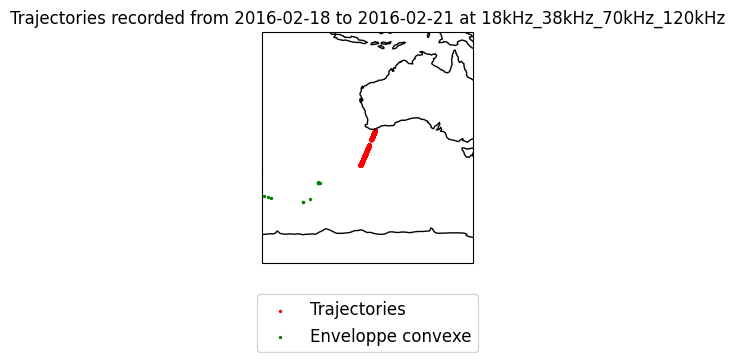

In [10]:
# Using Cartopy
list_cdf_files=get_list_files()    # Get all netcdf files path of folder chosen
ds = open_dataset_xr(3, list_cdf_files)    # Open netCDF into xarray
# depth = ds["DEPTH"].values
# print(type(depth))
display_trajectories(ds, enveloppe=True, save=True)      # Display trajectories
close_dataset(ds)     # Close dataset

### 4. Classify data

In [89]:
# classify_seasons() # Done for [18 and 38kz]

In [88]:
# test if every file was classified
import random 
all = get_list_files("../data/acoustic_data/18_38Hz/IMOS_18_and_38_Hz")
winter = [os.path.basename(f) for f in get_list_files("../data/acoustic_data/18_38Hz/winter")]
summer = [os.path.basename(f) for f in get_list_files("../data/acoustic_data/18_38Hz/summer")]
spring = [os.path.basename(f) for f in get_list_files("../data/acoustic_data/18_38Hz/spring")]
fall = [os.path.basename(f) for f in get_list_files("../data/acoustic_data/18_38Hz/fall")]

for f in all : 
    f = os.path.basename(f)
    if f not in winter and f not in summer and f not in spring and f not in fall : 
        print("nooo")

# test if file well classified
for i in range(0,10) : 
    # verif hiver
    r = random.randint(0, len(winter)-1)
    ds=nc.Dataset("../data/acoustic_data/18_38Hz/winter/"+winter[r])
    time_var = ds.variables["TIME"]
    date_var = nc.num2date(time_var[:], units=time_var.units, calendar=getattr(time_var, 'calendar', 'standard')) 
    months =set([date.month for date in date_var])
    assert (months & {6,7,8} != {})
    ds.close()

    # verif spring
    r = random.randint(0, len(spring)-1)
    ds=nc.Dataset("../data/acoustic_data/18_38Hz/spring/"+spring[r])
    time_var = ds.variables["TIME"]
    date_var = nc.num2date(time_var[:], units=time_var.units, calendar=getattr(time_var, 'calendar', 'standard')) 
    months =set([date.month for date in date_var])
    assert (months & {9, 10, 11} != {})
    ds.close()

    # verif summer
    r = random.randint(0, len(summer)-1)
    ds=nc.Dataset("../data/acoustic_data/18_38Hz/summer/"+summer[r])
    time_var = ds.variables["TIME"]
    date_var = nc.num2date(time_var[:], units=time_var.units, calendar=getattr(time_var, 'calendar', 'standard')) 
    months =set([date.month for date in date_var])
    assert (months & {12, 1, 2} != {})
    ds.close()

    # verif summer
    r = random.randint(0, len(fall)-1)
    ds=nc.Dataset("../data/acoustic_data/18_38Hz/fall/"+fall[r])
    time_var = ds.variables["TIME"]
    date_var = nc.num2date(time_var[:], units=time_var.units, calendar=getattr(time_var, 'calendar', 'standard')) 
    months =set([date.month for date in date_var])
    assert (months & {3, 4, 5} != {})
    ds.close()